In [1]:
%matplotlib inline

In [2]:
from fastai.basics import *

In [36]:
# data
n = 100
deg = 3
_x = np.random.uniform(low=-1, high=2, size=n)
x = torch.from_numpy(np.array([_x**_p for _p in range(deg)]).T).float()

# true model
y_fun = lambda a: x@a

# parameters
a = tensor(0., 3., 2)
y = y_fun(a) + torch.rand(n)

In [34]:
?torch.from_numpy

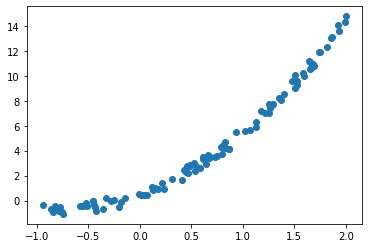

In [37]:
plt.scatter(_x, y);

In [12]:
def mse(y_hat, y): 
    return ((y_hat-y)**2).mean()

In [38]:
a_guess = tensor(1., 1, 1)

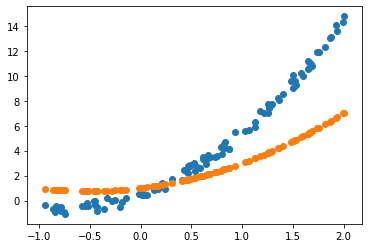

In [39]:
plt.scatter(_x, y);
plt.scatter(_x, y_fun(a_guess));

In [40]:
a_p = nn.Parameter(a_guess); a_p

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)

In [41]:
def update():
    y_hat = y_fun(a_p)
    loss = mse(y, y_hat)
    if t % 10 == 0: 
        print("Loss = {:.4f}".format(loss))
    loss.backward()
    with torch.no_grad():
        a_p.sub_(lr*a_p.grad)
        a_p.grad.zero_()

In [42]:
lr = 1e-1
n_epoch = 11
for t in range(n_epoch): 
    update()

Loss = 10.3151
Loss = 0.2755


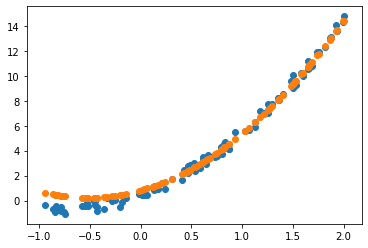

In [43]:
plt.scatter(_x,y)
plt.scatter(_x, y_fun(a_p.detach()));


In [23]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [47]:
a_p = nn.Parameter(tensor(-1.,1, 1))

fig = plt.figure()
plt.scatter(_x, y, c='orange')
line, = plt.plot(_x, y_fun(a_p.detach()), '*')
plt.close()

def animate(i):
    update()
    line.set_ydata(y_fun(a_p.detach()))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Loss = 21.4841
Loss = 1.4065
Loss = 0.4085
Loss = 0.3373
Loss = 0.3134
Loss = 0.2939
Loss = 0.2766
Loss = 0.2610
Loss = 0.2469
Loss = 0.2341
Loss = 0.2224
Loss = 0.2118
Loss = 0.2021
Loss = 0.1932
Loss = 0.1851
Loss = 0.1775
Loss = 0.1706
Loss = 0.1642
Loss = 0.1583
Loss = 0.1529
Loss = 0.1478
Loss = 0.1431
Loss = 0.1387
Loss = 0.1347
Loss = 0.1309
Loss = 0.1274
Loss = 0.1242
Loss = 0.1211
Loss = 0.1183
Loss = 0.1156
Loss = 0.1132
Loss = 0.1109
Loss = 0.1087
Loss = 0.1067
Loss = 0.1049
Loss = 0.1031
Loss = 0.1015
Loss = 0.1000
Loss = 0.0986
Loss = 0.0973
Loss = 0.0960
Loss = 0.0949
Loss = 0.0938
Loss = 0.0928
Loss = 0.0918
Loss = 0.0909
Loss = 0.0901
Loss = 0.0894
Loss = 0.0886
Loss = 0.0880
Loss = 0.0873
Loss = 0.0867
Loss = 0.0862
Loss = 0.0857
Loss = 0.0852
Loss = 0.0848
Loss = 0.0843
Loss = 0.0839
Loss = 0.0836
Loss = 0.0832
Loss = 0.0829
Loss = 0.0826
Loss = 0.0823
Loss = 0.0821
Loss = 0.0818
Loss = 0.0816
Loss = 0.0814
Loss = 0.0812
Loss = 0.0810
Loss = 0.0808
Loss = 0.0807
Loss 

In [48]:
import mpl_toolkits.mplot3d.axes3d as p3

In [62]:
a_p = nn.Parameter(tensor(-1.,1, 5))

fig = plt.figure()
ax = p3.Axes3D(fig)

ax.scatter(_x, y, zs=1, c='orange')
line, = ax.plot(_x, y_fun(a_p.detach()).numpy(), 1, '*')
plt.close()

def animate(i):
    update()
    # 2d
    #line.set_ydata(y_fun(a_p.detach()))
    # 3d
    line.set_data(_x, y_fun(a_p.detach()).numpy())
    line.set_3d_properties(np.ones(n))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Loss = 5.5028
Loss = 2.8717
Loss = 2.5056
Loss = 2.2780
Loss = 2.0817
Loss = 1.9079
Loss = 1.7532
Loss = 1.6150
Loss = 1.4910
Loss = 1.3794
Loss = 1.2786
Loss = 1.1873
Loss = 1.1042
Loss = 1.0285
Loss = 0.9593
Loss = 0.8960
Loss = 0.8378
Loss = 0.7843
Loss = 0.7350
Loss = 0.6895
Loss = 0.6474
Loss = 0.6085
Loss = 0.5725
Loss = 0.5390
Loss = 0.5080
Loss = 0.4792
Loss = 0.4524
Loss = 0.4274
Loss = 0.4042
Loss = 0.3826
Loss = 0.3624
Loss = 0.3436
Loss = 0.3261
Loss = 0.3098
Loss = 0.2946
Loss = 0.2804
Loss = 0.2671
Loss = 0.2547
Loss = 0.2431
Loss = 0.2323
Loss = 0.2222
Loss = 0.2128
Loss = 0.2040
Loss = 0.1958
Loss = 0.1881
Loss = 0.1809
Loss = 0.1742
Loss = 0.1680
Loss = 0.1621
Loss = 0.1566
Loss = 0.1515
Loss = 0.1467
Loss = 0.1423
Loss = 0.1381
Loss = 0.1342
Loss = 0.1306
Loss = 0.1271
Loss = 0.1240
Loss = 0.1210
Loss = 0.1182
Loss = 0.1156
Loss = 0.1132
Loss = 0.1109
Loss = 0.1088
Loss = 0.1068
Loss = 0.1049
Loss = 0.1032
Loss = 0.1016
Loss = 0.1001
Loss = 0.0986
Loss = 0.0973
Loss =

In [57]:
?line.set_3d_properties